In [1]:
import pandas as pd
import numpy as np

pathDict = {
    "femaleV1":{"rsp":"liwc_female_responses", "vals":"liwc_female_orig_mod_vals", "mod_feat":"liwc_femal_mod", "orig_feat":"liwc_femal_orig"},
    "femaleV2":{"rsp":"liwc_female_v2_responses", "vals":"liwc_female_orig_mod_vals", "mod_feat":"liwc_femal_mod", "orig_feat":"liwc_femal_orig"},
    "my_mine":{"rsp":"my_mine_responses_v2", "vals":"my_mine_orig_mod_vals", "mod_feat":"my_mine_mod", "orig_feat":"my_mine_orig"}
}
experiment = "my_mine"
responses = pd.read_csv("../datasets/"+pathDict[experiment]["rsp"]+".csv") #Options: "liwc_female_responses.csv", "liwc_female_v2_responses.csv"
liwc_vals = pd.read_csv("../datasets/"+pathDict[experiment]["vals"]+".csv") #Options: "liwc_female_orig_mod_vals.csv", "my_mine_orig_mod_vals.csv"
print(liwc_vals.columns)
print(responses.columns)

Index(['post_id', 'my_mine_orig', 'AHR original predict',
       'AHR original actual', 'AHR modified predict', 'my_mine_mod'],
      dtype='object')
Index(['StartDate', 'EndDate', 'Status', 'Progress', 'Duration (in seconds)',
       'Finished', 'RecordedDate', 'ResponseId', 'DistributionChannel',
       'UserLanguage', 'consent', 'graphic', 'heartatk', 'scenario_1_action',
       'scenario_1_person', 's1t_First Click', 's1t_Last Click',
       's1t_Page Submit', 's1t_Click Count', 'scenario_2_action',
       'scenario_2_person', 's2t_First Click', 's2t_Last Click',
       's2t_Page Submit', 's2t_Click Count', 'scenario_3_action',
       'scenario_3_person', 's3t_First Click', 's3t_Last Click',
       's3t_Page Submit', 's3t_Click Count', 'scenario_4_action',
       'scenario_4_person', 's4t_First Click', 's4t_Last Click',
       's4t_Page Submit', 's4t_Click Count', 'scenario_5_action',
       'scenario_5_person', 's5t_First Click', 's5t_Last Click',
       's5t_Page Submit', 's5t_Cl

In [2]:
print(responses.shape)


(991, 80)


In [3]:
print(responses['AC'].value_counts())
print(responses['q_3_is_modified'].isna().sum())


1                                                                 861
2                                                                  11
5                                                                   6
3                                                                   4
4                                                                   2
In this task, you read five passages that all dealt with what?      1
{"ImportId":"QID73"}                                                1
Name: AC, dtype: int64
486


In [4]:
df = responses.loc[(responses["heartatk"] =="4")& (responses["consent"] =="1")]

df_fil = df.dropna(subset=["scenario_1_action", "scenario_2_action", "scenario_3_action", "scenario_4_action", "scenario_5_action"])
df_fil = df_fil.dropna(subset=["scenario_1_person", "scenario_2_person", "scenario_3_person", "scenario_4_person", "scenario_5_person"])
df_fil = df_fil.dropna(subset=["q_1_id", "q_2_id", "q_3_id", "q_4_id", "q_5_id"])
print(df.shape)
colMax = {1: {"action":df_fil["scenario_1_action"].astype("int").max(), "person":df_fil["scenario_1_person"].astype("int").max()}, 2: {"action":df_fil["scenario_2_action"].astype("int").max(), "person":df_fil["scenario_2_person"].astype("int").max()}, 3: {"action":df_fil["scenario_3_action"].astype("int").max(), "person":df_fil["scenario_3_person"].astype("int").max()}, 4: {"action":df_fil["scenario_4_action"].astype("int").max(), "person":df_fil["scenario_4_person"].astype("int").max()}, 5: {"action":df_fil["scenario_5_action"].astype("int").max(), "person":df_fil["scenario_5_person"].astype("int").max()}, }
colMin = {1: {"action":df_fil["scenario_1_action"].astype("int").min(), "person":df_fil["scenario_1_person"].astype("int").min()}, 2: {"action":df_fil["scenario_2_action"].astype("int").min(), "person":df_fil["scenario_2_person"].astype("int").min()}, 3: {"action":df_fil["scenario_3_action"].astype("int").min(), "person":df_fil["scenario_3_person"].astype("int").min()}, 4: {"action":df_fil["scenario_4_action"].astype("int").min(), "person":df_fil["scenario_4_person"].astype("int").min()}, 5: {"action":df_fil["scenario_5_action"].astype("int").min(), "person":df_fil["scenario_5_person"].astype("int").min()}, }
print(colMax)
print(colMin)

(974, 80)
{1: {'action': 46, 'person': 44}, 2: {'action': 39, 'person': 37}, 3: {'action': 39, 'person': 37}, 4: {'action': 39, 'person': 37}, 5: {'action': 39, 'person': 37}}
{1: {'action': 40, 'person': 38}, 2: {'action': 33, 'person': 31}, 3: {'action': 33, 'person': 31}, 4: {'action': 33, 'person': 31}, 5: {'action': 33, 'person': 31}}


In [5]:
print(df['scenario_1_action'].value_counts())
print(df.shape)

40    325
41    147
42    113
43     96
44     94
45     76
46     64
Name: scenario_1_action, dtype: int64
(974, 80)


In [6]:
import math
csv_col_modified = pathDict[experiment]["mod_feat"] 
csv_col_orig = pathDict[experiment]["orig_feat"]  

def is_float(element) -> bool:
    try:
        float(element)
        return True
    except ValueError:
        return False

def recodeValues(columnIdx, isAction, value):
    if str(value).strip().lower()=="nan":
        return None
    value = int(value)
    return value - colMin[columnIdx]["action" if isAction else "person"] +1
    
def getLiwcVals(type, id):
    col = csv_col_orig if type == "orig" else csv_col_modified
    print(id)
    to_ret =liwc_vals.loc[liwc_vals["post_id"]==id][col].item()
    return float(to_ret)
    
new_format =[]
# New format is: id, is_modified, answer_action,answer_person
badEntryCounter=0
for index, row in df.iterrows():
    dmy = str(row["gender"]).strip().lower()
    gender = None
    if dmy == "4":
        gender =1
    elif dmy=="5":
        gender = -1
    elif dmy=="6":
        gender = 2
    elif dmy=="7":
        gender=3
    else:
        badEntryCounter+=1

    for i in range(1,6):
        r_id = row[f"q_{i}_id"]
        print(type(r_id))
        if  (is_float(r_id) and math.isnan(r_id)) or (r_id.isnumeric() and math.isnan(int(r_id))):
            badEntryCounter+=1
            #not sure if bad entry counter is correct or should be diveded by 4
            continue
       
        r_isMod = 1 if row[f"q_{i}_is_modified"] == "true" else -1
        r_action =  recodeValues(i, True, row[f"scenario_{i}_action"])
        r_person = recodeValues(i, False, row[f"scenario_{i}_person"])
        r_age = None if str(row["age"]).strip().lower() == "nan" else int(row["age"])
        r_gender = gender
        r_responseId = row["ResponseId"]
        r_ac = row["AC"]

        print(r_id)
        if "IMTA for getting a cat" in r_id:
            r_id = "k5kh4d"
        r_liwcOrig = getLiwcVals("orig", r_id)
        r_liwcMod = getLiwcVals("modified", r_id)
        cond_low = ["k5n8gp","ayuhfj","d7rqv7","da5lf4","d8tktt","di121p","e6gioh","kbfqn0","d7bwco","lflkbi","ghb1qd","dq7o60","c16a49","azhjxy","b6ex3u","bt96e5","jmyghg","acx62a","cwd2sm","d11pwp"]
        cond_high=["d2z9tl","j0rubv","dhswh1","hptojb","eq475l","Ds0fwd","ikxa0t","jpgxl6","bt8iou","ec7ciw","ehyyhk","ck5jvn","m46pif","lol9kc","bs5p6l","dn6075","jncy5t","hql2q4","cjudzm","n2wjkt"]
        r_is_cond_high = 1 if r_id in cond_high else -1
        r_i = [r_id, r_isMod, r_action, r_person, r_age, r_gender, r_responseId, r_ac, r_liwcOrig, r_liwcMod, r_is_cond_high ]
        new_format.append(r_i)


print("NAN values:",badEntryCounter)
df_new_format = pd.DataFrame(np.array(new_format), columns=['scenarioId', 'isModified', 'scenarioAction', 'scenarioPerson', "age", "gender", "responseId", "acResponse", "originalFeatureValue", "modifiedFeatureValue", "isConditionalHigh"], )
df_new_format["isModified"] = df_new_format["isModified"].astype("Int64")
df_new_format["scenarioAction"] = df_new_format["scenarioAction"].astype("Int64")
df_new_format["scenarioPerson"] = df_new_format["scenarioPerson"].astype("Int64")
df_new_format["gender"] = df_new_format["gender"].astype("Int64")
df_new_format["age"] = df_new_format["age"].astype("Int64")
df_new_format["originalFeatureValue"] = df_new_format["originalFeatureValue"].astype("Float64")
df_new_format["modifiedFeatureValue"] = df_new_format["modifiedFeatureValue"].astype("Float64")
df_new_format["isConditionalHigh"] = df_new_format["isConditionalHigh"].astype("Int64")



print("TRANSFORMED OUTPUT STILL CONTAINS ATTENTION CHECK")

<class 'str'>
ay3kdp
ay3kdp
ay3kdp
<class 'str'>
bli4mz
bli4mz
bli4mz
<class 'str'>
blubn0
blubn0
blubn0
<class 'str'>
e554ox
e554ox
e554ox
<class 'str'>
efa2c0
efa2c0
efa2c0
<class 'str'>
g18tep
g18tep
g18tep
<class 'str'>
e554ox
e554ox
e554ox
<class 'str'>
aojzfj
aojzfj
aojzfj
<class 'str'>
ajdybt
ajdybt
ajdybt
<class 'str'>
ikxqk1
ikxqk1
ikxqk1
<class 'str'>
i0lgy2
i0lgy2
i0lgy2
<class 'str'>
l2zhzl
l2zhzl
l2zhzl
<class 'str'>
d21pgp
d21pgp
d21pgp
<class 'str'>
ca0xic
ca0xic
ca0xic
<class 'str'>
ajdybt
ajdybt
ajdybt
<class 'str'>
ikxqk1
ikxqk1
ikxqk1
<class 'str'>
e554ox
e554ox
e554ox
<class 'str'>
l2zhzl
l2zhzl
l2zhzl
<class 'str'>
aojzfj
aojzfj
aojzfj
<class 'str'>
i0lgy2
i0lgy2
i0lgy2
<class 'str'>
e554ox
e554ox
e554ox
<class 'str'>
ajdybt
ajdybt
ajdybt
<class 'str'>
d21pgp
d21pgp
d21pgp
<class 'str'>
IMTA for getting a cat without her sisters permission? In the beginning of 2020 there were rumors about the pandemic spreading fast and how Mary’s area might shut down soon. She tec

(4855, 11)
scenarioId               object
isModified                Int64
scenarioAction            Int64
scenarioPerson            Int64
age                       Int64
gender                    Int64
responseId               object
acResponse               object
originalFeatureValue    Float64
modifiedFeatureValue    Float64
isConditionalHigh         Int64
dtype: object


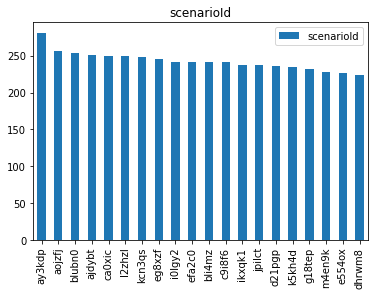

In [7]:
df_new_format[["scenarioId"]].apply(pd.value_counts).plot(kind='bar', subplots=True)
print(df_new_format.shape)
print(df_new_format.dtypes)

In [21]:
#print(df_new_format['scenarioPerson'].value_counts())
#print(df_new_format["originalFeatureValue"].head(10))
print(df_new_format.isna().sum())
print(df_new_format.isin(['nan']).sum(axis=0))

scenarioId                0
isModified                0
scenarioAction          378
scenarioPerson          378
age                     445
gender                  445
responseId                0
acResponse              445
originalFeatureValue      0
modifiedFeatureValue      0
isConditionalHigh         0
dtype: int64
scenarioId              0
isModified              0
scenarioAction          0
scenarioPerson          0
age                     0
gender                  0
responseId              0
acResponse              0
originalFeatureValue    0
modifiedFeatureValue    0
isConditionalHigh       0
dtype: int64


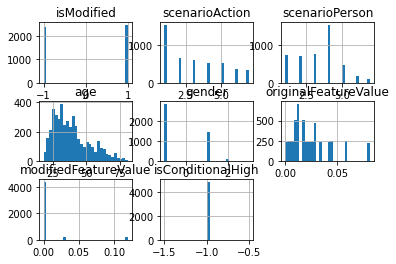

In [22]:
hist = df_new_format.hist(bins=30)

In [26]:
df_new_format.to_excel(pathDict[experiment]["rsp"]+"-transformed_final.xlsx", index=False)

In [24]:
df_new = df_new_format.dropna(axis='rows')

id_dict = {}
for index, row in df_new.iterrows():
    id = row["scenarioId"]
    jdgAction = row["scenarioAction"]
    jdgPerson = row["scenarioPerson"]
    
    isMod = row["isModified"]
    if id in id_dict:
        tmp = id_dict[id]
        tmp["action"+str(isMod)].append(jdgAction)
        tmp["person"+str(isMod)].append(jdgPerson)
        id_dict[id] = tmp
    else:
        tmp = {}
        if isMod > 0:
            tmp["action-1"] = []
            tmp["person-1"] = []
            tmp["action1"] = [jdgAction]
            tmp["person1"] = [jdgPerson]
        else: 
            tmp["action1"] = []
            tmp["person1"] = []
            tmp["action-1"] = [jdgAction]
            tmp["person-1"] = [jdgPerson]
        id_dict[id] = tmp


In [25]:
import statistics
data = []
for index, row in liwc_vals.iterrows():
    AHR_orig = row["AHR original actual"]
    my_mine_orig = row["my_mine_orig"]
    my_mine_modified = row["my_mine_mod"]
    id = row["post_id"]
    actionModified = statistics.mean(id_dict[id]["action1"])
    personModified = statistics.mean(id_dict[id]["person1"])
    actionOrig = statistics.mean(id_dict[id]["action-1"])
    personOrig = statistics.mean(id_dict[id]["person-1"])
    tmp_row =[id, AHR_orig, my_mine_orig, actionOrig, personOrig, my_mine_modified, actionModified, personModified]
    tmp_row_np = np.array(list(map(lambda x:str(x), tmp_row)))
    data.append(tmp_row_np)

np_data = np.array(data,dtype=object)
print(np_data.shape)

df_dunno = pd.DataFrame(np_data,
                   columns=['post_id', 'asshole_ratio_original', 'my_mine_original', "action_avg_original", "person_avg_original", "my_mine_modified","action_avg_modified", "person_avg_modified"])

df_dunno.to_excel("my_mine_transformed_final.xlsx",index=False)

(20, 8)
